## Import Necessary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
import os

## Extract Data

In [2]:
inspections = pd.read_csv('../rawdata/inspections.csv')
violations = pd.read_csv('../rawdata/violations.csv')

## Data Exploration

In [3]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386336 entries, 0 to 386335
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ACTIVITY DATE         386336 non-null  object
 1   OWNER ID              386336 non-null  object
 2   OWNER NAME            386336 non-null  object
 3   FACILITY ID           386336 non-null  object
 4   FACILITY NAME         386336 non-null  object
 5   RECORD ID             386336 non-null  object
 6   PROGRAM NAME          386336 non-null  object
 7   PROGRAM STATUS        386336 non-null  object
 8   PROGRAM ELEMENT (PE)  386336 non-null  int64 
 9   PE DESCRIPTION        386336 non-null  object
 10  FACILITY ADDRESS      386336 non-null  object
 11  FACILITY CITY         386336 non-null  object
 12  FACILITY STATE        386336 non-null  object
 13  FACILITY ZIP          386336 non-null  int64 
 14  SERVICE CODE          386336 non-null  int64 
 15  SERVICE DESCRIPTI

In [4]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   SERIAL NUMBER          1048575 non-null  object 
 1   VIOLATION  STATUS      1048575 non-null  object 
 2   VIOLATION CODE         1048575 non-null  object 
 3   VIOLATION DESCRIPTION  1048575 non-null  object 
 4   POINTS                 1048575 non-null  float64
dtypes: float64(1), object(4)
memory usage: 40.0+ MB


In [5]:
inspections.columns = inspections.columns.str.lower()
inspections.columns = inspections.columns.str.replace(' ','_')
violations.columns = violations.columns.str.lower()
violations.columns = violations.columns.str.replace(' ','_')

In [6]:
inspections.score.max(), inspections.score.min()

(100, 3)

In [7]:
violations.points.max(), violations.points.min()

(11.0, 0.0)

* Inspections Score MAX value shows us there are some restaurants that got perfect scores

In [8]:
inspections['serial_number'].nunique(),violations['serial_number'].nunique()

(386336, 224009)

In [9]:
merged_df = pd.merge(inspections, violations, how = 'left', on = 'serial_number')

In [10]:
merged_df.head()

activity_date   owner_id        owner_name facility_id   facility_name  \
0    11/10/2015  OW0126532  GEN TORRANCE LLC   FA0162834  GEN KOREAN BBQ   
1    11/10/2015  OW0126532  GEN TORRANCE LLC   FA0162834  GEN KOREAN BBQ   
2    11/10/2015  OW0126532  GEN TORRANCE LLC   FA0162834  GEN KOREAN BBQ   
3    11/10/2015  OW0126532  GEN TORRANCE LLC   FA0162834  GEN KOREAN BBQ   
4    11/10/2015  OW0126532  GEN TORRANCE LLC   FA0162834  GEN KOREAN BBQ   

   record_id    program_name program_status  program_element_(pe)  \
0  PR0150985  GEN KOREAN BBQ         ACTIVE                  1638   
1  PR0150985  GEN KOREAN BBQ         ACTIVE                  1638   
2  PR0150985  GEN KOREAN BBQ         ACTIVE                  1638   
3  PR0150985  GEN KOREAN BBQ         ACTIVE                  1638   
4  PR0150985  GEN KOREAN BBQ         ACTIVE                  1638   

                        pe_description  ... facility_zip service_code  \
0  RESTAURANT (61-150) SEATS HIGH RISK  ...        90505            1   
1  RESTAURANT (61-150) SEATS HIGH RISK  ...        90505            1   
2  RESTAURANT (61-150) SEATS HIGH RISK  ...        90505            1   
3  RESTAURANT (61-150) SEATS HIGH RISK  ...        90505            1   
4  RESTAURANT (61-150) SEATS HIGH RISK  ...        90505            1   

  service_description  score  serial_number employee_id  violation__status  \
0  ROUTINE INSPECTION     93      DA0EU4KUG   EE0000306  OUT OF COMPLIANCE   
1  ROUTINE INSPECTION     93      DA0EU4KUG   EE0000306  OUT OF COMPLIANCE   
2  ROUTINE INSPECTION     93      DA0EU4KUG   EE0000306  OUT OF COMPLIANCE   
3  ROUTINE INSPECTION     93      DA0EU4KUG   EE0000306  OUT OF COMPLIANCE   
4  ROUTINE INSPECTION     93      DA0EU4KUG   EE0000306  OUT OF COMPLIANCE   

  violation_code                              violation_description points  
0           F027                 # 27. Food separated and protected    1.0  
1           F037  # 37. Adequate ventilation and lighting; desig...    1.0  
2           F040  # 40. Plumbing: Plumbing in good repair, prope...    1.0  
3           F006  # 06. Adequate handwashing facilities supplied...    2.0  
4           F036  # 36. Equipment, utensils and linens: storage ...    1.0  

[5 rows x 23 columns]

In [11]:
merged_df['activity_date'] = pd.to_datetime(merged_df['activity_date'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210653 entries, 0 to 1210652
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   activity_date          1210653 non-null  datetime64[ns]
 1   owner_id               1210653 non-null  object        
 2   owner_name             1210653 non-null  object        
 3   facility_id            1210653 non-null  object        
 4   facility_name          1210653 non-null  object        
 5   record_id              1210653 non-null  object        
 6   program_name           1210653 non-null  object        
 7   program_status         1210653 non-null  object        
 8   program_element_(pe)   1210653 non-null  int64         
 9   pe_description         1210653 non-null  object        
 10  facility_address       1210653 non-null  object        
 11  facility_city          1210653 non-null  object        
 12  facility_state         12106

### Understanding the Scoring
* Points column is the number of points taken for the violation.
* Score is the overall inpsection score out of 100.
---
* Information from LA County Food Inspection Reference Guide:
__[Inspection Guide](http://www.publichealth.lacounty.gov/eh/docs/RefGuideFoodInspectionReport.pdf)__

>* Major Violation results in 4 pt Deduction
>* Two Major Violations result in additional 3pt deduction and possible closure
>* Permit suspension due to vermin infestation, no water, or now sewage available, additional 7pt deduction for each closure type
>* Minor Violation result in 2pt deduction
>* Good Retail Practicies (Low Risk Violations), result in 1 pt violation

### Additional Notes

* Serial Number is unique ID for each inspection
* Record ID is a UNIQUE ID number for each health program at a facility. A facility can have multiple programs!
* Program name is a unique name for each program

* Now restaurants that got perfect scores are included in the merged data frame --> look at null values in violation_status, violation_code, violation_description, and points
* Split the program elements part!
* Analyze by program elements broken down
* Break down the date time by year --> analyze by year
* Analyze by month!

* Now inspect score and number of inspections by year and month
* First remove duplicates --> serial numbers change with each inspection --> remove duplicates for that to get the accurate count and distribution for scores

In [12]:
merged_df['year'] = merged_df['activity_date'].dt.year
merged_df['month'] = merged_df['activity_date'].dt.month
merged_df['day'] = merged_df['activity_date'].dt.day
merged_df['quarter'] = merged_df['activity_date'].dt.quarter
merged_df.head(10)

activity_date   owner_id                    owner_name facility_id  \
0    2015-11-10  OW0126532              GEN TORRANCE LLC   FA0162834   
1    2015-11-10  OW0126532              GEN TORRANCE LLC   FA0162834   
2    2015-11-10  OW0126532              GEN TORRANCE LLC   FA0162834   
3    2015-11-10  OW0126532              GEN TORRANCE LLC   FA0162834   
4    2015-11-10  OW0126532              GEN TORRANCE LLC   FA0162834   
5    2015-11-10  OW0126532              GEN TORRANCE LLC   FA0162834   
6    2015-11-24  OW0001872  AHMEDALI & GENERAL PARTNERSH   FA0010972   
7    2015-11-24  OW0001872  AHMEDALI & GENERAL PARTNERSH   FA0010972   
8    2015-11-24  OW0035173                  TEA LAB INC.   FA0050882   
9    2015-12-01  OW0029788                   RAZO KARINA   FA0061342   

    facility_name  record_id    program_name program_status  \
0  GEN KOREAN BBQ  PR0150985  GEN KOREAN BBQ         ACTIVE   
1  GEN KOREAN BBQ  PR0150985  GEN KOREAN BBQ         ACTIVE   
2  GEN KOREAN BBQ  PR0150985  GEN KOREAN BBQ         ACTIVE   
3  GEN KOREAN BBQ  PR0150985  GEN KOREAN BBQ         ACTIVE   
4  GEN KOREAN BBQ  PR0150985  GEN KOREAN BBQ         ACTIVE   
5  GEN KOREAN BBQ  PR0150985  GEN KOREAN BBQ         ACTIVE   
6         DENNY'S  PR0035665         DENNY'S         ACTIVE   
7         DENNY'S  PR0035665         DENNY'S         ACTIVE   
8         TEA LAB  PR0048348         TEA LAB         ACTIVE   
9    EL BOTANITAS  PR0025074    EL BOTANITAS       INACTIVE   

   program_element_(pe)                       pe_description  ...  \
0                  1638  RESTAURANT (61-150) SEATS HIGH RISK  ...   
1                  1638  RESTAURANT (61-150) SEATS HIGH RISK  ...   
2                  1638  RESTAURANT (61-150) SEATS HIGH RISK  ...   
3                  1638  RESTAURANT (61-150) SEATS HIGH RISK  ...   
4                  1638  RESTAURANT (61-150) SEATS HIGH RISK  ...   
5                  1638  RESTAURANT (61-150) SEATS HIGH RISK  ...   
6                  1638  RESTAURANT (61-150) SEATS HIGH RISK  ...   
7                  1638  RESTAURANT (61-150) SEATS HIGH RISK  ...   
8                  1635   RESTAURANT (31-60) SEATS HIGH RISK  ...   
9                  1632    RESTAURANT (0-30) SEATS HIGH RISK  ...   

  serial_number employee_id  violation__status  violation_code  \
0     DA0EU4KUG   EE0000306  OUT OF COMPLIANCE            F027   
1     DA0EU4KUG   EE0000306  OUT OF COMPLIANCE            F037   
2     DA0EU4KUG   EE0000306  OUT OF COMPLIANCE            F040   
3     DA0EU4KUG   EE0000306  OUT OF COMPLIANCE            F006   
4     DA0EU4KUG   EE0000306  OUT OF COMPLIANCE            F036   
5     DA0EU4KUG   EE0000306  OUT OF COMPLIANCE            F044   
6     DA0DQXBB6   EE0000188  OUT OF COMPLIANCE            F033   
7     DA0DQXBB6   EE0000188  OUT OF COMPLIANCE            F035   
8     DAPTZRYA2   EE0000487                NaN             NaN   
9     DAMGF0NU4   EE0000249  OUT OF COMPLIANCE            F042   

                               violation_description points  year month day  \
0                 # 27. Food separated and protected    1.0  2015    11  10   
1  # 37. Adequate ventilation and lighting; desig...    1.0  2015    11  10   
2  # 40. Plumbing: Plumbing in good repair, prope...    1.0  2015    11  10   
3  # 06. Adequate handwashing facilities supplied...    2.0  2015    11  10   
4  # 36. Equipment, utensils and linens: storage ...    1.0  2015    11  10   
5  # 44. Floors, walls and ceilings: properly bui...    1.0  2015    11  10   
6  # 33. Nonfood-contact surfaces clean and in go...    1.0  2015    11  24   
7  # 35. Equipment/Utensils - approved; installed...    1.0  2015    11  24   
8                                                NaN    NaN  2015    11  24   
9  # 42. Toilet facilities: properly constructed,...    1.0  2015    12   1   

  quarter  
0       4  
1       4  
2       4  
3       4  
4       4  
5       4  
6       4  
7       4  
8       4  
9       4  

[10 rows x 27 columns]

In [13]:
# Serial numbers are unique for each inspection. 
dropped_dup = merged_df.drop_duplicates(subset = ['serial_number'], keep = 'first')
dropped_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386336 entries, 0 to 1210646
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   activity_date          386336 non-null  datetime64[ns]
 1   owner_id               386336 non-null  object        
 2   owner_name             386336 non-null  object        
 3   facility_id            386336 non-null  object        
 4   facility_name          386336 non-null  object        
 5   record_id              386336 non-null  object        
 6   program_name           386336 non-null  object        
 7   program_status         386336 non-null  object        
 8   program_element_(pe)   386336 non-null  int64         
 9   pe_description         386336 non-null  object        
 10  facility_address       386336 non-null  object        
 11  facility_city          386336 non-null  object        
 12  facility_state         386336 non-null  obj

### Notes
* There were 386336 inspections since 2015
* There are some missing violation information - Points, Violation_status, violation_code, violation_description

### Number of Inspections Yearly, Monthly, and by Day of Month

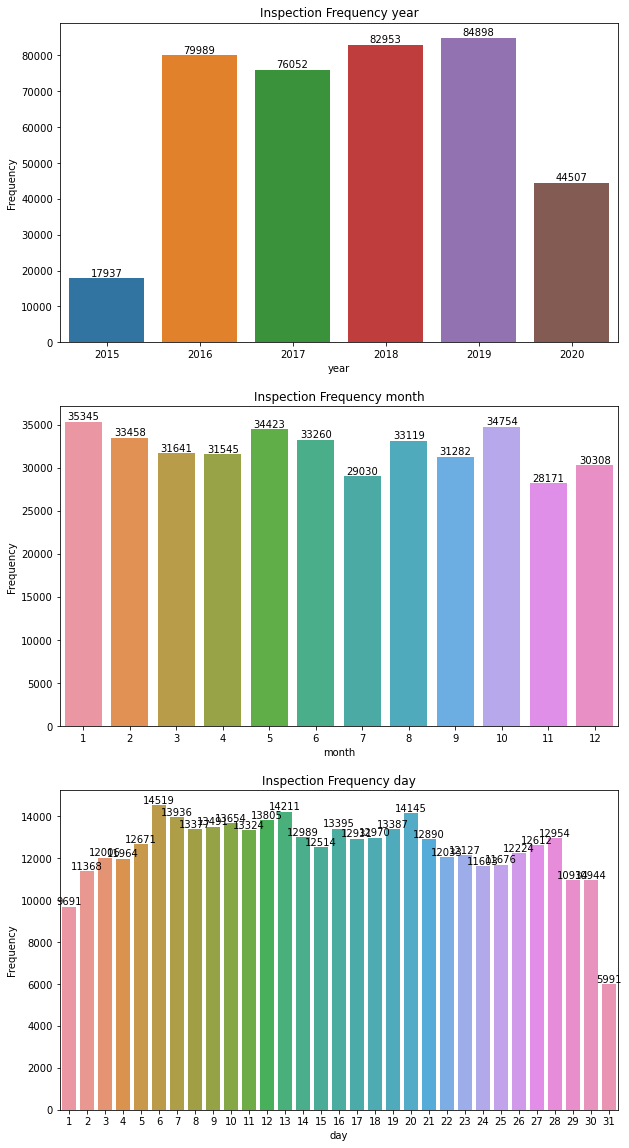

In [14]:
fig, ax = plt.subplots(3, 1, figsize = (10,20))

for idx, time in enumerate(['year','month','day']):

    ct = dropped_dup[time].value_counts().sort_index()
    
    ax[idx] = sns.barplot(x = ct.index, y = ct.values, order = ct.index, ax = ax[idx])
    
    ax[idx].set_xlabel(time)
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('Inspection Frequency {}'.format(time))
    
    rects = ax[idx].patches
    labels = ct.values
    
    for rect, label in zip(rects,labels):
        x = rect.get_x() + rect.get_width()/2
        y = rect.get_height() + 5
        ax[idx].text(x,y,label, ha = 'center', va = 'bottom')
    
plt.show()
    

### Quartely and Monthly Inspection Count by Year

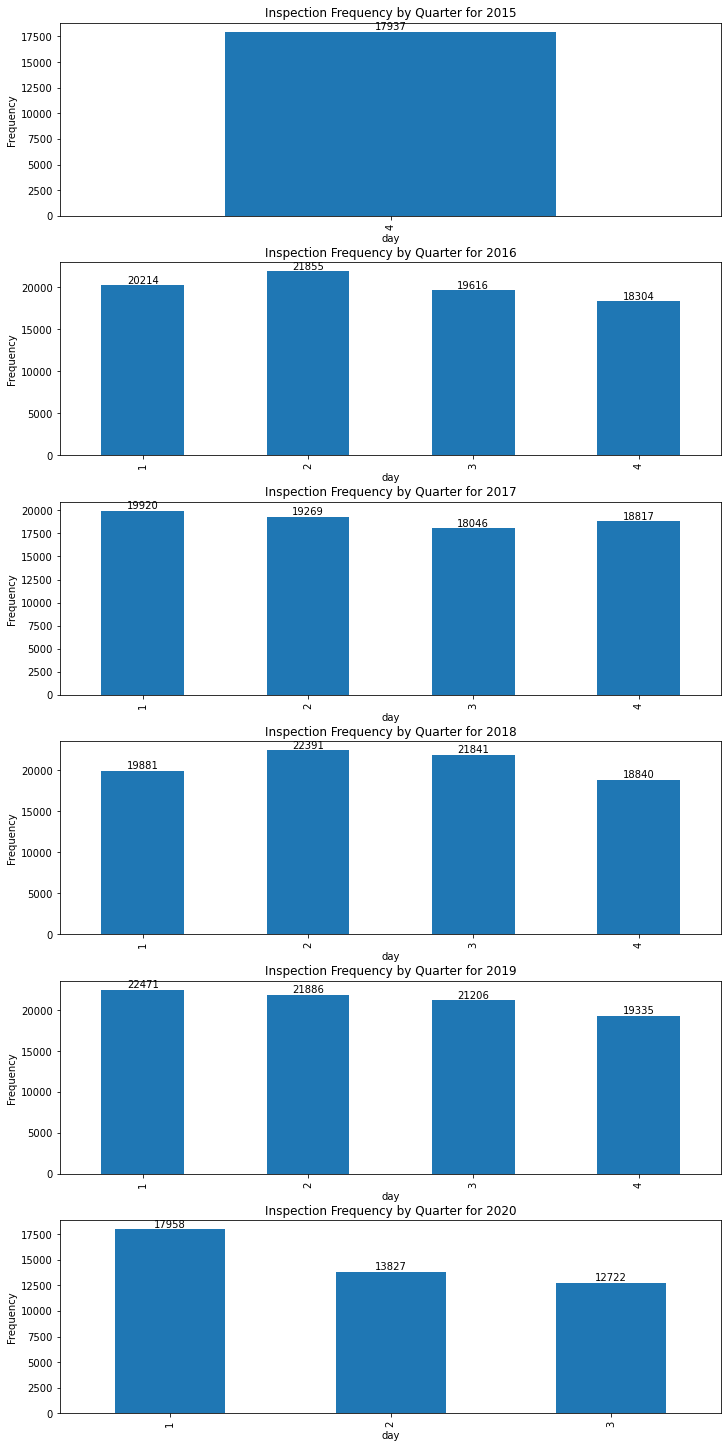

In [15]:
#Quarterly Inspection Count by Year

fig, ax = plt.subplots(6,1, figsize = (10,20))
years = [2015,2016,2017,2018,2019,2020]

for idx, year in enumerate(years):

    cnt = dropped_dup[dropped_dup['year']==year]['quarter'].value_counts().sort_index()
    
    ax[idx] = cnt.plot.bar(ax = ax[idx])
    
    ax[idx].set_xlabel(time)
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('Inspection Frequency by Quarter for {}'.format(year))
    fig.tight_layout(pad = 0.3)
    
    rects = ax[idx].patches
    labels = cnt.values
    
    for rect, label in zip(rects,labels):
        x = rect.get_x() + rect.get_width()/2
        y = rect.get_height() + 5
        ax[idx].text(x,y,label, ha = 'center', va = 'bottom')
        
plt.show()

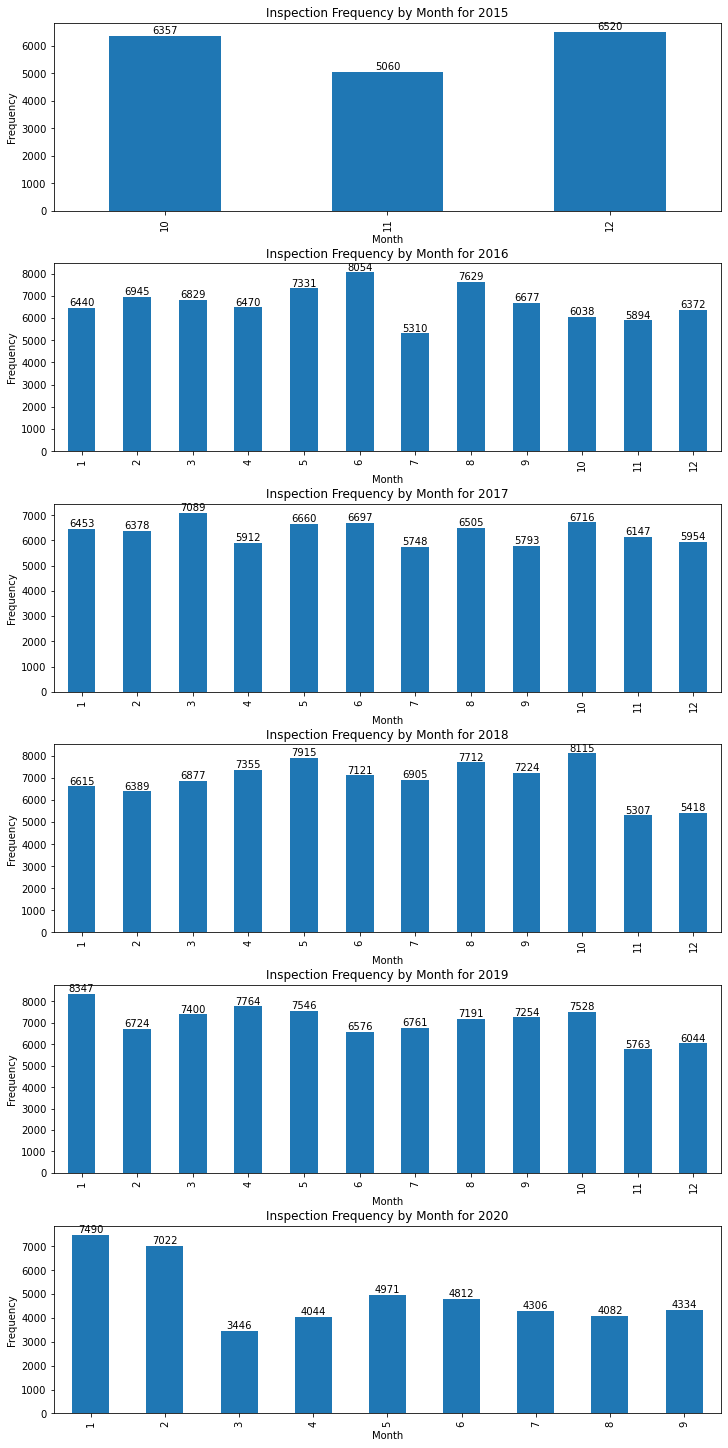

In [16]:
#Monthly Inspection Count by Year

fig, ax = plt.subplots(6,1, figsize = (10,20))
years = [2015,2016,2017,2018,2019,2020]

for idx, year in enumerate(years):

    cnt = dropped_dup[dropped_dup['year']==year]['month'].value_counts().sort_index()
    
    ax[idx] = cnt.plot.bar(ax = ax[idx])
    
    ax[idx].set_xlabel('Month')
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('Inspection Frequency by Month for {}'.format(year))
    fig.tight_layout(pad = 0.3)
    
    rects = ax[idx].patches
    labels = cnt.values
    
    for rect, label in zip(rects,labels):
        x = rect.get_x() + rect.get_width()/2
        y = rect.get_height() + 5
        ax[idx].text(x,y,label, ha = 'center', va = 'bottom')
        
plt.show()

* Zip Analysis with duplicates removed!

### Score Distribution on Dropped Duplicate Serial Numbers

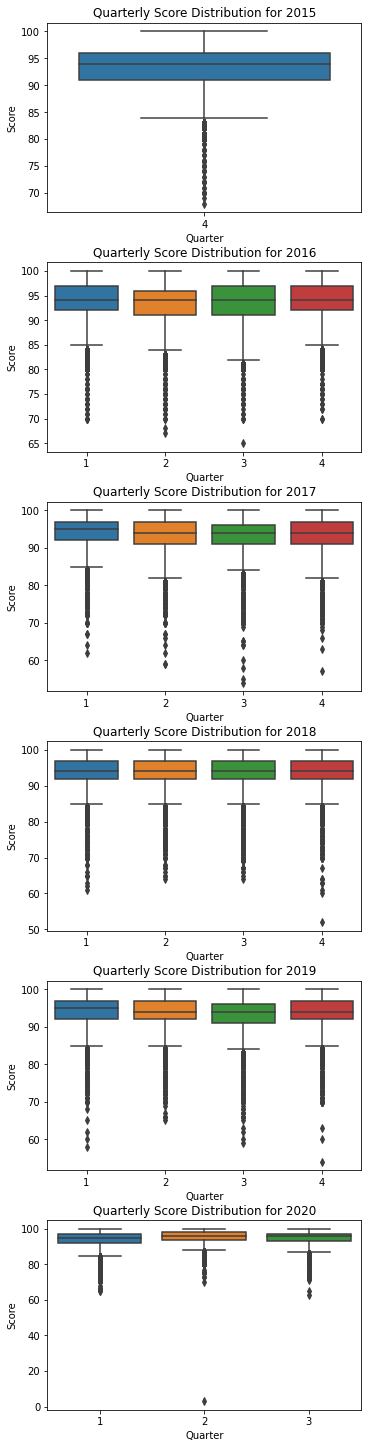

In [17]:
fig, ax = plt.subplots(6,1, figsize = (5,20))
years = [2015,2016,2017,2018,2019,2020]

for idx, year in enumerate(years):

    data = dropped_dup[dropped_dup['year']==year]
    sns.boxplot(x='quarter',y='score',data = data,ax = ax[idx])
    
   
    ax[idx].set_xlabel('Quarter')
    ax[idx].set_ylabel('Score')
    ax[idx].set_title('Quarterly Score Distribution for {}'.format(year))
    fig.tight_layout(pad = 0.3)
    
       
plt.show()

In [18]:
dropped_dup.groupby(['year','quarter'])['score'].describe()

count       mean       std   min   25%   50%   75%    max
year quarter                                                             
2015 4        17937.0  93.605508  3.821352  68.0  91.0  94.0  96.0  100.0
2016 1        20214.0  93.953646  3.623240  70.0  92.0  94.0  97.0  100.0
     2        21855.0  93.690368  3.731921  67.0  91.0  94.0  96.0  100.0
     3        19616.0  93.861185  3.683232  65.0  91.0  94.0  97.0  100.0
     4        18304.0  94.008687  3.588438  70.0  92.0  94.0  97.0  100.0
2017 1        19920.0  94.036898  3.823638  62.0  92.0  95.0  97.0  100.0
     2        19269.0  93.750272  3.936281  59.0  91.0  94.0  97.0  100.0
     3        18046.0  93.397761  4.239811  54.0  91.0  94.0  96.0  100.0
     4        18817.0  93.703088  4.023476  57.0  91.0  94.0  97.0  100.0
2018 1        19881.0  93.858810  3.954652  61.0  92.0  94.0  97.0  100.0
     2        22391.0  93.860971  3.829158  64.0  92.0  94.0  97.0  100.0
     3        21841.0  93.718191  4.037499  64.0  92.0  94.0  97.0  100.0
     4        18840.0  93.884076  3.874421  52.0  92.0  94.0  97.0  100.0
2019 1        22471.0  94.087179  3.763610  58.0  92.0  95.0  97.0  100.0
     2        21886.0  93.905510  3.769862  65.0  92.0  94.0  97.0  100.0
     3        21206.0  93.529096  4.086183  59.0  91.0  94.0  96.0  100.0
     4        19335.0  93.749211  3.954359  54.0  92.0  94.0  97.0  100.0
2020 1        17958.0  94.066099  3.666231  65.0  92.0  95.0  97.0  100.0
     2        13827.0  95.364794  3.318979   3.0  94.0  96.0  98.0  100.0
     3        12722.0  95.015092  3.407233  63.0  93.0  96.0  97.0  100.0

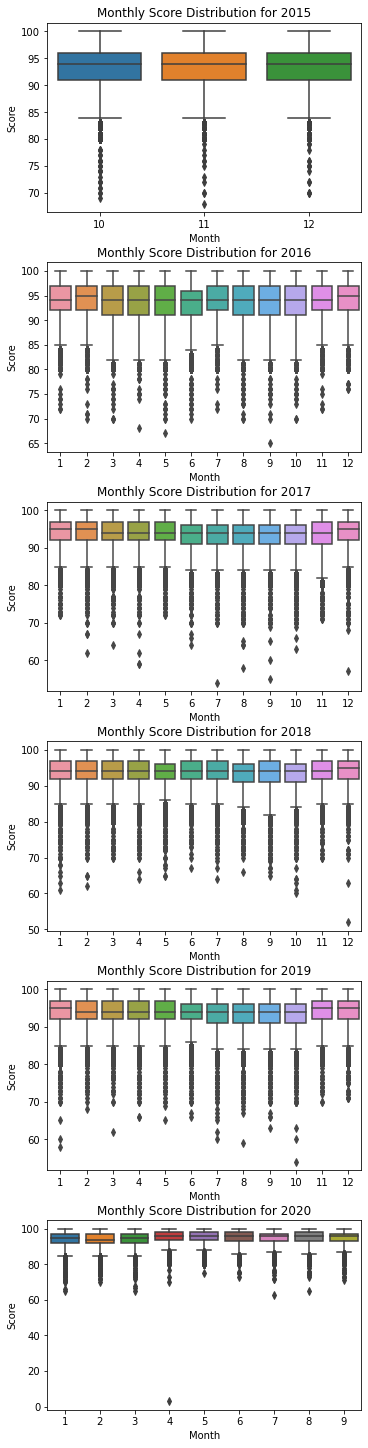

In [19]:
fig, ax = plt.subplots(6,1, figsize = (5,20))
years = [2015,2016,2017,2018,2019,2020]

for idx, year in enumerate(years):

    data = dropped_dup[dropped_dup['year']==year]
    sns.boxplot(x='month',y='score',data = data,ax = ax[idx])
    
   
    ax[idx].set_xlabel('Month')
    ax[idx].set_ylabel('Score')
    ax[idx].set_title('Monthly Score Distribution for {}'.format(year))
    fig.tight_layout(pad = 0.3)
    
       
plt.show()

In [20]:
dropped_dup.groupby(['year','month'])['score'].describe()

count       mean       std   min   25%   50%   75%    max
year month                                                            
2015 10     6357.0  93.374390  3.988675  69.0  91.0  94.0  96.0  100.0
     11     5060.0  93.630040  3.814316  68.0  91.0  94.0  96.0  100.0
     12     6520.0  93.811810  3.644127  70.0  91.0  94.0  96.0  100.0
2016 1      6440.0  93.996429  3.556194  72.0  92.0  94.0  97.0  100.0
     2      6945.0  94.116199  3.539630  70.0  92.0  95.0  97.0  100.0
     3      6829.0  93.747987  3.758164  70.0  91.0  94.0  97.0  100.0
     4      6470.0  93.799536  3.704518  68.0  91.0  94.0  97.0  100.0
     5      7331.0  93.743282  3.720979  67.0  91.0  94.0  97.0  100.0
     6      8054.0  93.554507  3.760057  70.0  91.0  94.0  96.0  100.0
     7      5310.0  94.021846  3.556859  72.0  92.0  94.0  97.0  100.0
     8      7629.0  93.834185  3.728377  70.0  91.0  94.0  97.0  100.0
     9      6677.0  93.764265  3.726232  65.0  91.0  94.0  97.0  100.0
     10     6038.0  93.908910  3.707097  70.0  91.0  94.0  97.0  100.0
     11     5894.0  93.912623  3.591759  72.0  92.0  94.0  97.0  100.0
     12     6372.0  94.192090  3.462218  76.0  92.0  95.0  97.0  100.0
2017 1      6453.0  94.090346  3.774780  72.0  92.0  95.0  97.0  100.0
     2      6378.0  94.118062  3.853644  62.0  92.0  95.0  97.0  100.0
     3      7089.0  93.915221  3.838185  64.0  92.0  94.0  97.0  100.0
     4      5912.0  93.826624  3.995415  59.0  92.0  94.0  97.0  100.0
     5      6660.0  93.792793  3.787493  72.0  92.0  94.0  97.0  100.0
     6      6697.0  93.640585  4.026011  64.0  91.0  94.0  96.0  100.0
     7      5748.0  93.491127  4.159190  54.0  91.0  94.0  96.0  100.0
     8      6505.0  93.252114  4.303388  58.0  91.0  94.0  96.0  100.0
     9      5793.0  93.468669  4.243425  55.0  91.0  94.0  96.0  100.0
     10     6716.0  93.391007  4.227612  63.0  91.0  94.0  96.0  100.0
     11     6147.0  93.728648  3.935855  71.0  91.0  94.0  97.0  100.0
     12     5954.0  94.028720  3.846721  57.0  92.0  95.0  97.0  100.0
2018 1      6615.0  93.803930  4.114382  61.0  92.0  94.0  97.0  100.0
     2      6389.0  93.807951  3.959433  62.0  92.0  94.0  97.0  100.0
     3      6877.0  93.958848  3.788615  70.0  92.0  94.0  97.0  100.0
     4      7355.0  93.844460  3.881156  64.0  92.0  94.0  97.0  100.0
     5      7915.0  93.812129  3.888866  65.0  92.0  94.0  96.0  100.0
     6      7121.0  93.932313  3.705700  67.0  92.0  94.0  97.0  100.0
     7      6905.0  93.857350  3.907359  64.0  92.0  94.0  97.0  100.0
     8      7712.0  93.661437  3.997584  66.0  91.0  94.0  96.0  100.0
     9      7224.0  93.645764  4.196352  65.0  91.0  94.0  97.0  100.0
     10     8115.0  93.600493  4.064655  60.0  91.0  94.0  96.0  100.0
     11     5307.0  94.006218  3.690607  70.0  92.0  94.0  97.0  100.0
     12     5418.0  94.189184  3.726705  52.0  92.0  95.0  97.0  100.0
2019 1      8347.0  94.213849  3.805719  58.0  92.0  95.0  97.0  100.0
     2      6724.0  93.992415  3.806971  68.0  92.0  94.0  97.0  100.0
     3      7400.0  94.030405  3.671689  62.0  92.0  94.0  97.0  100.0
     4      7764.0  93.916151  3.705270  66.0  92.0  94.0  97.0  100.0
     5      7546.0  94.004373  3.664760  65.0  92.0  94.0  97.0  100.0
     6      6576.0  93.779501  3.956729  66.0  92.0  94.0  96.0  100.0
     7      6761.0  93.590149  4.064191  60.0  91.0  94.0  96.0  100.0
     8      7191.0  93.505771  4.098229  59.0  91.0  94.0  96.0  100.0
     9      7254.0  93.495313  4.094589  63.0  91.0  94.0  96.0  100.0
     10     7528.0  93.270590  4.308667  54.0  91.0  94.0  96.0  100.0
     11     5763.0  94.034184  3.714897  70.0  92.0  95.0  97.0  100.0
     12     6044.0  94.073627  3.643974  71.0  92.0  95.0  97.0  100.0
2020 1      7490.0  94.128171  3.637297  65.0  92.0  95.0  97.0  100.0
     2      7022.0  93.975648  3.653463  70.0  92.0  94.0  97.0  100.0
     3      3446.0  94.115496  3.751189  65.0  92.0  95.0  97.0  100.0
     4      4044.0  95.616963  3.5094

* 2020 might have a transcription error with a score value of 3.
* Use heatmap to see if there is a strong correlation with year, months, and  days
*

### Score Distrubution by Zip

In [21]:
zip_split = dropped_dup.groupby('facility_zip')['score'].mean().sort_values(ascending=False).reset_index(name='score')

<AxesSubplot:xlabel='score', ylabel='Density'>

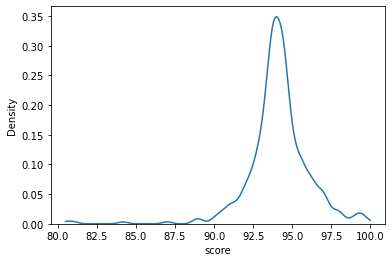

In [22]:
sns.kdeplot(data = zip_split,x='score', cut = 0, bw_adjust = 0.5)

### Score Distribution by Program Element - Dupllicate Removed

<AxesSubplot:xlabel='score', ylabel='pe_description'>

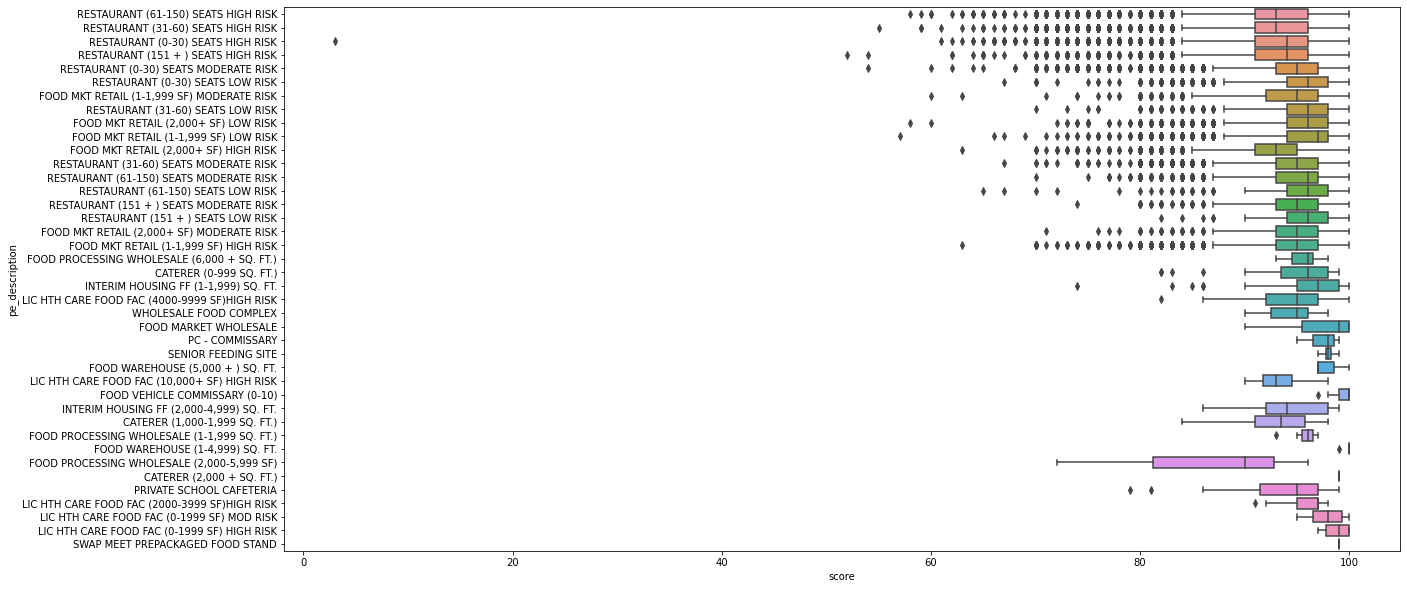

In [23]:
plt.figure(figsize=(20,10))

sns.boxplot(x = 'score',y = 'pe_description', data = dropped_dup, orient = 'h')

### Score Distribution by Violation Type - Duplicate NOT Removed

### Explore violation data

In [25]:
merged_df['violation__status'].value_counts()

OUT OF COMPLIANCE       1048234
VIOLATION                     3
HOUSING NON-CRITICAL          1
Name: violation__status, dtype: int64

In [27]:
merged_df[merged_df['violation__status']=='VIOLATION']

activity_date   owner_id           owner_name facility_id  \
515722    2017-10-13  OW0102120    TAWAT & SON, INC.   FA0138823   
565367    2018-01-16  OW0007408          CHENG, EANG   FA0025782   
857825    2019-01-23  OW0100745  PARK, SUNG H. ET AL   FA0137619   

                     facility_name  record_id                program_name  \
515722  BABY ELEPHANT THAI CUISINE  PR0123191  BABY ELEPHANT THAI CUISINE   
565367            MR GOOD'S DONUTS  PR0010753            MR GOOD'S DONUTS   
857825                SUSHI WAKANA  PR0121736                SUSHI WAKANA   

       program_status  program_element_(pe)  \
515722         ACTIVE                  1635   
565367         ACTIVE                  1631   
857825         ACTIVE                  1632   

                               pe_description  ... serial_number employee_id  \
515722     RESTAURANT (31-60) SEATS HIGH RISK  ...     DA0C0D8GJ   EE0000263   
565367  RESTAURANT (0-30) SEATS MODERATE RISK  ...     DA3VCK59Z   EE0000821   
857825      RESTAURANT (0-30) SEATS HIGH RISK  ...     DAI04SXIY   EE0000015   

       violation__status  violation_code  \
515722         VIOLATION            F029   
565367         VIOLATION            F050   
857825         VIOLATION            F050   

                                    violation_description points  year month  \
515722  # 29. Toxic substances properly identified, st...    1.0  2017    10   
565367                            # 51. Permit Suspension    0.0  2018     1   
857825                            # 51. Permit Suspension    0.0  2019     1   

       day quarter  
515722  13       4  
565367  16       1  
857825  23       1  

[3 rows x 27 columns]

In [28]:
merged_df['violation_code'].unique()

array(['F027', 'F037', 'F040', 'F006', 'F036', 'F044', 'F033', 'F035',
       nan, 'F042', 'F039', 'F030', 'F007', 'F052', 'F004', 'F029',
       'F014', 'F038', 'F043', 'F001', 'F034', 'F048', 'F032', 'F023',
       'F021', 'F046', 'F025', 'F013', 'F041', 'F005', 'F026', 'F049',
       'F016', 'F031', 'F009', 'F053', 'F022', 'F050', 'F055', 'F054',
       'F008', 'F011', 'W024', 'W026', 'W052', 'F045', 'F024', 'F015',
       'F018', 'F002', 'F028', 'F019', 'F047', 'F010', 'W028', 'W034',
       'F012', 'F003', 'W005', 'W047', 'W001', 'W051', 'W006', 'F051',
       'W053', 'W011', 'F017', 'W023', 'SF15', 'W041', 'W027', 'W014',
       'W044', 'W020', 'W050', 'W017', 'W003', 'W031', 'W039', 'W004',
       'W016', 'F058', 'F057', 'W029', 'H102', 'F056', 'W048', 'W035',
       'W019', 'W033', 'W021', 'W032', 'MF08', 'MF45', 'MF36', 'F020',
       'W022', 'W025', 'W030', 'W007', 'MP15', 'CV30', 'CV31', 'CV27',
       'CV45', 'CV29'], dtype=object)

* Check out F002, F005, F007-F011, F013-F15, F20-23 and F50 which is permit suspension

In [40]:
lst = ['F002','F005','F007','F008','F009','F010','F011','F013','F014','F015','F020','F021','F022','F023','F050']


b = pd.DataFrame()
for i in lst:
    a = merged_df[merged_df['violation_code']==i].head(2)
    b = b.append(a)
b

activity_date   owner_id                              owner_name  \
3002       2015-11-12  OW0184217                     LARSEN'S STEAKHOUSE   
49482      2015-11-14  OW0128454                           JIN CONG WANG   
169        2016-04-28  OW0106857        FC JUICE PARTNERS CALIFORNIA LLC   
326        2016-09-19  OW0006768                    CERRITOS L AND L INC   
22         2015-12-16  OW0031302                        SALAZAR, RAMON R   
36         2015-12-30  OW0012090            FONDA DON CHON RESTAURANT IN   
702        2018-01-03  OW0242515                      KATSUNORI HISANAGA   
734        2018-02-21  OW0036648                         TSIBOUKAS, ALEX   
345        2016-10-13  OW0039327                            WU JIAN YANG   
384        2016-12-08  OW0025317                            MUNDANAS INC   
10548      2015-10-09  OW0007608            CHIPOTLE MEXICAN GRILL, INC.   
33481      2015-10-14  OW0115428  SOUTHERN CALIFORNIA FLOATING CHRISTIAN   
736        2018-02-21  OW0036648                         TSIBOUKAS, ALEX   
2790       2015-10-30  OW0005076                           BOTECO 1, LLC   
135        2016-04-07  OW0003092                           AROYAN MOVSES   
207        2016-05-26  OW0016489                    HTC RESTAURANT GROUP   
42         2016-01-06  OW0035172                        TEA KITCHEN INC.   
52         2016-01-19  OW0099386                          BAZIKYAN, INC.   
2144       2015-10-27  OW0012042                         FLORES, MARIA M   
4117       2015-11-17  OW0036933                       FICHI GROUP, INC.   
771017     2018-12-03  OW0009005            CRENSHAW CHRISTIAN CENTER/FS   
1145366    2020-01-21  OW0238075                   DE TOLEDO HIGH SCHOOL   
93         2016-03-04  OW0208580                        BATANG GALAS LLC   
103        2016-03-10  OW0037907                              VILLA,JOSE   
545        2017-07-17  OW0007871                          CHOP STOP INC.   
2413       2015-10-06  OW0012337                 FREEMAN PIZZA COMPANIES   
84         2016-02-16  OW0014882                               HARO,NINA   
197        2016-05-11  OW0123870                       GELATERIA ULI LLC   
547        2017-07-17  OW0007871                          CHOP STOP INC.   
1157       2019-09-19  OW0015594                          HIRANI, DHANJI   

        facility_id                          facility_name  record_id  \
3002      FA0178473                    LARSEN'S STEAKHOUSE  PR0171905   
49482     FA0165172                      U.S. CHINESE FOOD  PR0153487   
169       FA0222662                            JAMBA JUICE  PR0177688   
326       FA0032778              L AND L HAWAIIAN BARBEQUE  PR0000718   
22        FA0045003                        R & R SOUL FOOD  PR0038525   
36        FA0013838                         FONDA DON CHON  PR0039266   
702       FA0248008                                    YUI  PR0196669   
734       FA0022626                   FANTASTIC CHARBURGER  PR0024069   
345       FA0041601                      YANG'S RESTAURANT  PR0029227   
384       FA0021345                             LAS ANITAS  PR0032340   
10548     FA0059744                 CHIPOTLE MEXICAN GRILL  PR0019760   
33481     FA0150246                   BEACON LIGHT MISSION  PR0135724   
736       FA0022626                   FANTASTIC CHARBURGER  PR0024069   
2790      FA0058594                     BOTECO-28 WEST BAR  PR0044442   
135       FA0041218                               MOISHE'S  PR0042110   
207       FA0044566                    PRESIDENT THAI CAFE  PR0036809   
42        FA0036716                     TEN RENS TEA TI ME  PR0003478   
52        FA0136733                             CAFE BRAVO  PR0119951   
2144      FA0065508             LATINOS 99~ DISCOUNT STORE  PR0005449   
4117      FA0040981                   SEAFOOD RANCH MARKET  PR0036856   
771017    FA0017223              CRENSHAW CHRISTIAN CENTER  PR0047447   
1145366   FA0242463  DE TOLEDO HS/NEW  COMMUN

* Filter Major Violations using pts
---
#### Major Violations 
* Major Violations have a point deduction of 4pts or 11pts. 
* The violation code is lst above. --> Some violation codes can be marked as minor violations hence the conditional loop.

In [53]:
major_violations = merged_df.loc[(merged_df['points'] == 4.0) | (merged_df['points'] == 11.0)]
major_violations.shape

(50881, 27)

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

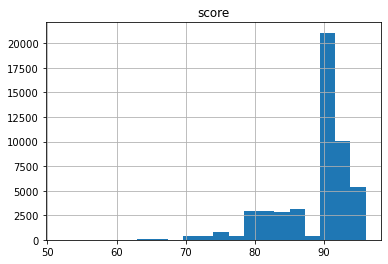

In [56]:
major_violations.hist(column = 'score', bins = 20)

<AxesSubplot:xlabel='score', ylabel='Density'>

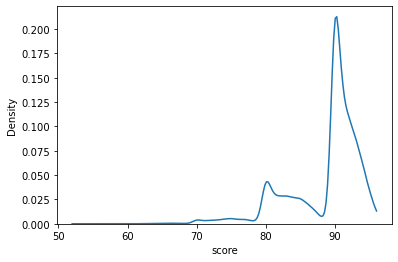

In [55]:
sns.kdeplot(data = major_violations,x='score', cut = 0)

In [59]:
major_violations['facility_zip'].value_counts().head(15)

91748    1078
90045     923
90012     765
91754     723
91801     604
90401     537
90025     535
90015     517
90291     509
90230     464
93534     460
90703     459
90201     459
90064     456
90650     446
Name: facility_zip, dtype: int64

In [61]:
(major_violations['record_id'] + ' : ' + major_violations['facility_name']).value_counts().head(30)

PR0189419 : PLANET HOLLYWOOD                20
PR0156336 : GOLD HIBACHI BUFFET             19
PR0170854 : HAWAIIAN BBQ HOUSE              19
PR0031392 : BANH MI MY THO                  18
PR0156516 : PHO BANH MI CHE CALI            16
PR0168279 : HIBACHI GRILL BUFFET            16
PR0028061 : CHINA BOY EXPRESS BAKERY        15
PR0148023 : JAMES BEACH                     15
PR0031553 : SAN SOO DANG                    15
PR0023808 : THAI DISHES RESTAURANT          15
PR0034955 : MONTEREY PALACE RESTAURANT      15
PR0177458 : EAST SEAFOOD BUFFET             15
PR0004316 : NBC SEAFOOD RESTAURANT          15
PR0018307 : KANG KANG SHAU MAY RESTAURAN    14
PR0039287 : HOP WOO BBQ RESTAURANT          14
PR0010156 : NICE TIME CAFE                  14
PR0003465 : SHAU MAY RESTAURANT             14
PR0025993 : SAM WOO RESTAURANT              14
PR0191208 : SUNDAY BISTRO                   14
PR0041366 : A B C CAFE                      13
PR0014334 : BANH MI & CHE CALI REST/MKT     13
PR0000460 : A

In [66]:
merged_df[(merged_df['record_id'] == 'PR0189419') & (merged_df['year']==2018)]

activity_date   owner_id                 owner_name facility_id  \
593782    2018-03-06  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
593783    2018-03-06  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
593784    2018-03-06  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
593785    2018-03-06  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
593786    2018-03-06  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604931    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604932    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604933    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604934    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604935    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604936    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604937    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604938    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604939    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604940    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604941    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
604942    2018-02-16  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697366    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697367    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697368    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697369    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697370    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697371    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697372    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697373    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
697374    2018-05-29  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
750017    2018-08-24  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
750018    2018-08-24  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
750019    2018-08-24  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
750020    2018-08-24  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
750021    2018-08-24  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
750022    2018-08-24  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   
750023    2018-08-24  OW0237254  PLANET EXPRESS (LAX)  LLC   FA0241313   

           facility_name  record_id      program_name program_status  \
593782  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
593783  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
593784  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
593785  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
593786  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604931  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604932  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604933  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604934  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604935  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604936  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604937  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604938  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604939  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604940  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604941  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
604942  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
697366  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
697367  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYWOOD         ACTIVE   
697368  PLANET HOLLYWOOD  PR0189419  PLANET HOLLYW

<AxesSubplot:xlabel='score', ylabel='violation_description'>

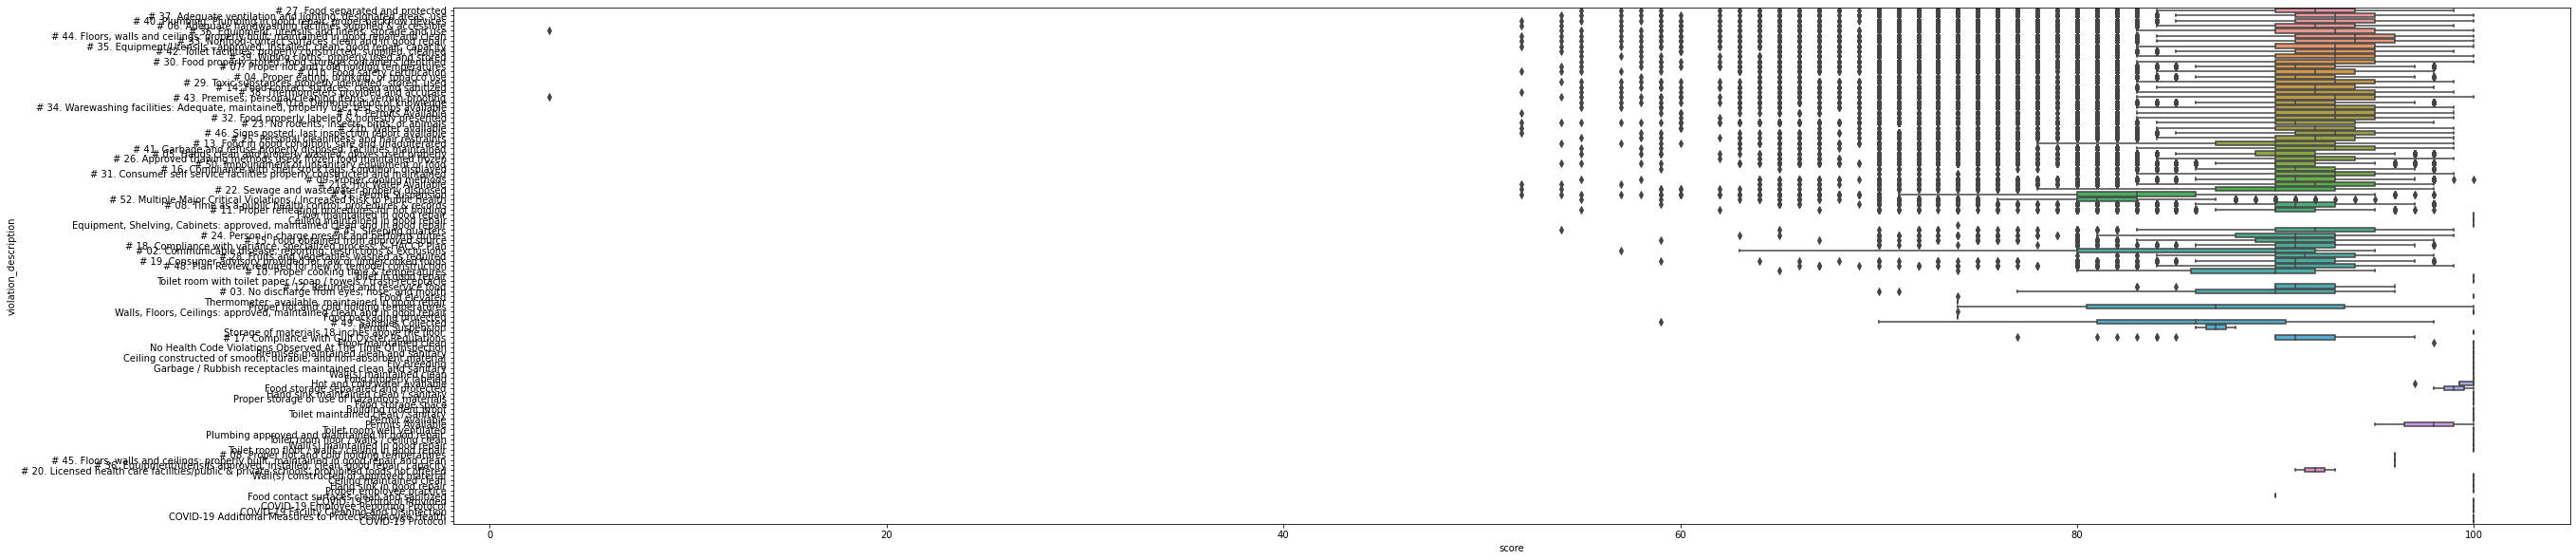

In [26]:
plt.figure(figsize=(40,10))

sns.boxplot(x = 'score',y = 'violation_description', data = merged_df, orient = 'h')

### Major Risks and Closure

### Categorizing Critical Risk (Minor & Major), Good Retail Practices, and Compliance Violations

In [ ]:
merged_df['points'].value_counts(dropna=False)

### Notes about points
* 4 pts is MAJOR VIOLATION
* 3 pts is the additional reduction for two major violations
* 2 pts is a Minor Violation
* 1 pt is Good Retail Practices Violation
* Permit suspension due to vermin infestation, no water, or now sewage available, additional 7pt deduction for each closure type -> 4 + 7 = 11 so 11 pts must be one of those
* What are the NaN Values and What are the 0.0 Values?



In [ ]:
zero_pts = merged_df.loc[merged_df['points']==0.0]
zero_pts.iloc[:,0:18].head()


In [ ]:
null_pts = merged_df[merged_df['points'].isnull()]
null_pts['score'].value_counts().head()

In [ ]:
perf_score = merged_df[merged_df['score']==100]
perf_score['points'].value_counts(dropna=False)

* Null doesn't necessarily mean that the restaurants got perfect sores
* Score of 100 doesn't necessarily mean that the points is 0 or Nan......
* So there is some transcription error.....

* How do I deal with this??? ASK MENTOR!!!

In [ ]:
print(merged_df[(merged_df['points']==2) &(merged_df['score']==100)])
merged_df[merged_df['serial_number']=='DABH9GD40']

In [ ]:
sns.kdeplot(data = dropped_dup, x = 'score', hue = 'pe_description')

###  Look at Score Distribution on Dropped Duplicate Serial Number!

In [ ]:
merged_df[('violation_code','violation_id')].unique()